In [28]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict
from langgraph.types import Command

In [29]:
class State(TypedDict):
    transfer_reason: str


graph_builder = StateGraph(State)

In [30]:
from typing import Literal


def triage_node(state: State) -> Command[Literal["account_support", "tech_support"]]:
    return Command(
        goto="account_support",
        update={
            "transfer_reason": "The user wants to change password.",
        },
    )


def tech_support(state: State):
    return {}


def account_support(state: State):
    print("account_support running")
    return {}

In [31]:
graph_builder.add_node("triage_node", triage_node)
graph_builder.add_node("tech_support", tech_support)
graph_builder.add_node("account_support", account_support)


graph_builder.add_edge(START, "triage_node")

graph_builder.add_edge("tech_support", END)
graph_builder.add_edge("account_support", END)

In [32]:
graph = graph_builder.compile()

graph.invoke({})

account_support running


{'transfer_reason': 'The user wants to change password.'}

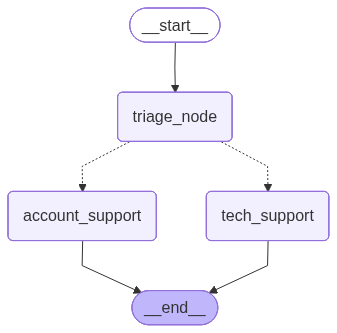

In [33]:
graph